In [29]:
import pandas as pd 
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [55]:
df=pd.read_excel('C:/Users/Vladimir/Documents/юрга/DATA/ТГУ_bigDATA/1_line.xlsx')

In [56]:
df.head()

,Data,BT28500,BT29000,BT31200,T22412,F22410,P22400,T22323,M10I,M20I,...,BT30001,BT30002,BT30100,BT31201,PerfAVG1m,BT31010,BT31020,P22100,P22220,V22040Spd
0,2018-10-01 00:00:11,72.5,72.2,18.8,610.4197,7718.278,57.36613,814.4718,47.62376,45.71271,...,136.4,135.8,184.3,70.2,8.847008,NaN,NaN,NaN,NaN,NaN
1,2018-10-01 00:01:11,72.5,72.0,18.9,610.7091,7729.532,57.59768,812.1563,48.24580,46.39869,...,136.5,135.8,184.3,70.1,6.459155,NaN,NaN,NaN,NaN,NaN
2,2018-10-01 00:02:11,72.2,70.9,18.9,610.4197,7723.289,57.82923,816.7873,48.31686,46.80357,...,136.4,135.8,184.3,70.1,8.803488,NaN,NaN,NaN,NaN,NaN
3,2018-10-01 00:03:11,72.0,71.6,18.9,609.8408,7720.808,57.88712,816.2084,47.87905,47.37381,...,136.4,135.8,184.4,70.1,7.071424,NaN,NaN,NaN,NaN,NaN
4,2018-10-01 00:04:11,72.0,71.8,19.0,609.5514,7744.606,57.71346,814.7612,47.76055,46.95531,...,136.4,135.8,184.5,70.1,7.822194,NaN,NaN,NaN,NaN,NaN


In [57]:
df.shape

(132398, 96)

# чекаем пропуски в столбцах

In [96]:
for i in list(df):
    print(df[i].isna().sum()/df.shape[0])

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
1.0
1.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.27628060846840585
0.27628060846840585
1.0
1.0
1.0


In [75]:
df1=df.dropna(axis=1, how='all')

# Удаляем высоко коррелированые фичи

In [97]:
# Create correlation matrix
corr_matrix = df1.corr().abs()

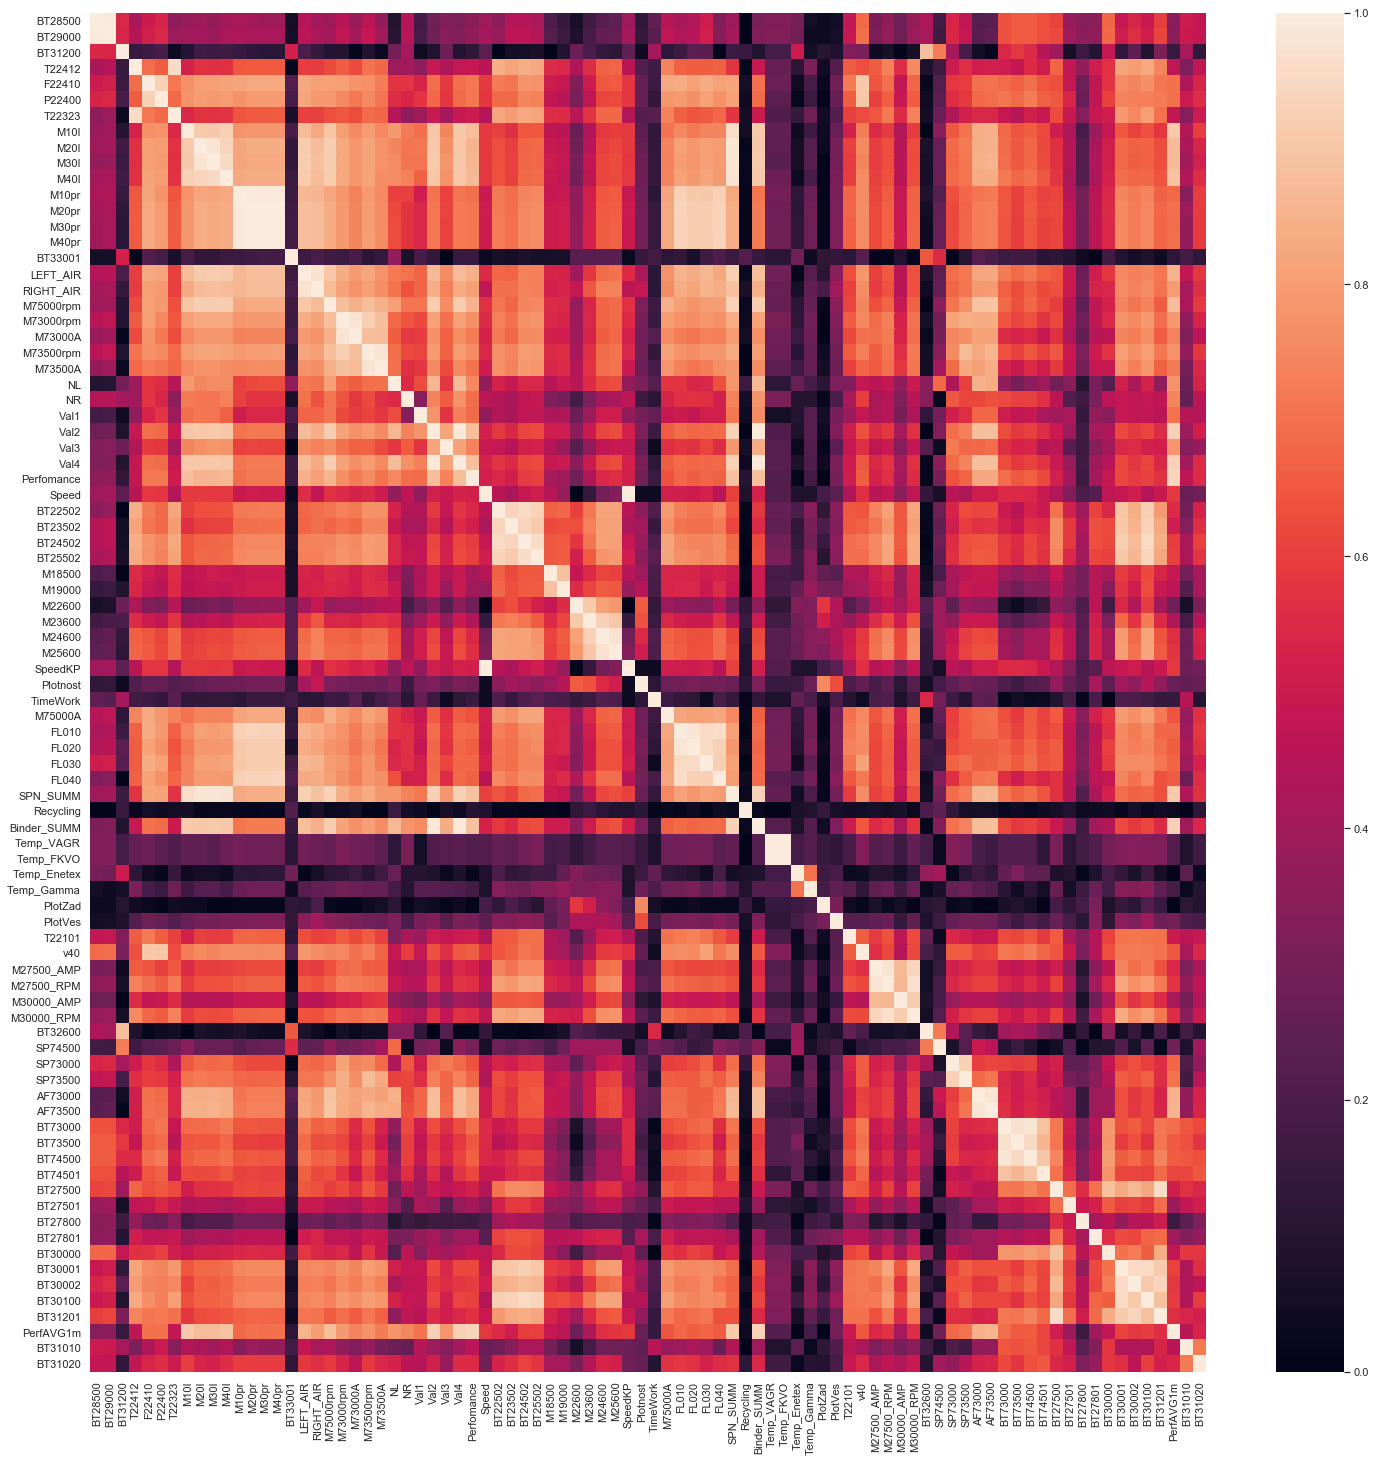

In [98]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(25, 25)
# plot the heatmap
sns.heatmap(corr_matrix)

In [91]:
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]


In [94]:
df2=df1.drop(to_drop, axis=1)

In [95]:
df2.shape

(132398, 43)

In [101]:
df2.to_csv("final.csv", index=False)

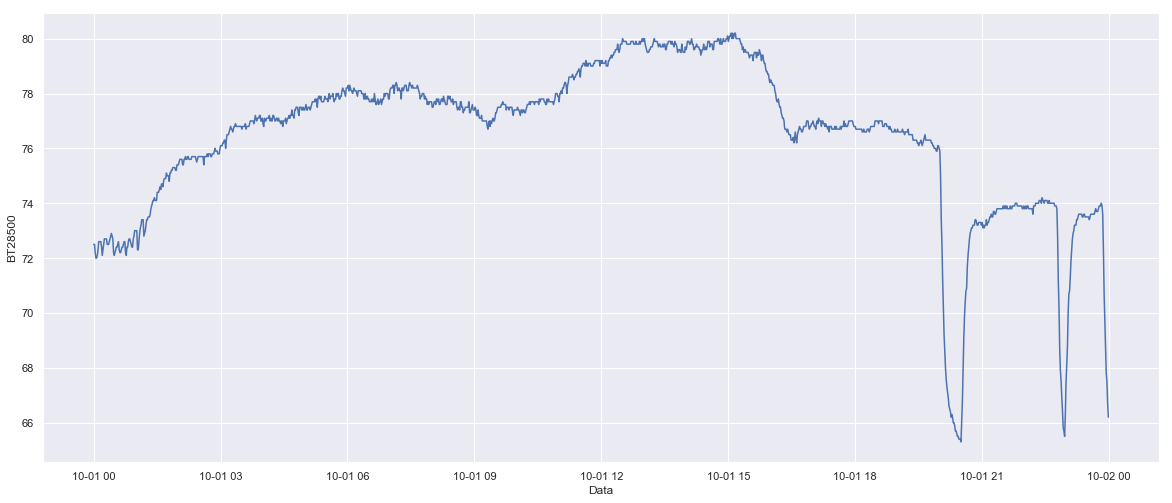

In [83]:
sns.lineplot(x='Data', y='BT28500', data=df1)

# Вторая лининя

In [105]:
df0=pd.read_excel('C:/Users/Vladimir/Documents/юрга/DATA/ТГУ_bigDATA/2_line.xlsx')

In [106]:
df0.shape

(132398, 96)

In [107]:
df0.head()

,Data,BT28500,BT29000,BT31200,T22412,F22410,P22400,T22323,M10I,M20I,...,BT30001,BT30002,BT30100,BT31201,PerfAVG1m,BT31010,BT31020,P22100,P22220,V22040Spd
0,2018-10-01 00:00:11,72.9,72.7,16.1,596.2374,8227.938,56.15051,824.8915,17.68015,17.7,...,142.4,57.3,176.5,71.8,-1.616870,NaN,NaN,NaN,NaN,NaN
1,2018-10-01 00:01:11,72.9,71.7,16.1,595.9479,8212.564,55.39797,825.4703,17.75299,17.7,...,141.7,57.0,176.3,71.2,-1.617081,NaN,NaN,NaN,NaN,NaN
2,2018-10-01 00:02:11,72.6,70.2,16.1,595.9479,8178.975,54.99276,819.1027,17.73995,17.4,...,140.7,56.7,176.0,70.6,7.940719,NaN,NaN,NaN,NaN,NaN
3,2018-10-01 00:03:11,72.9,70.8,16.1,595.3690,8227.268,55.57164,818.2344,17.68675,18.3,...,140.0,56.6,175.9,70.1,-1.618308,NaN,NaN,NaN,NaN,NaN
4,2018-10-01 00:04:11,73.0,72.1,16.1,594.7902,8191.643,55.34009,824.6021,17.80392,18.5,...,139.4,56.5,175.6,69.5,-1.618503,NaN,NaN,NaN,NaN,NaN


In [113]:
for i in list(df0):
    print(df0[i].isna().sum())

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
81635
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
36579
36579


In [111]:
df01=df0.dropna(axis=1, how='all')

In [114]:
df01.shape

(132398, 87)

In [116]:
# Create correlation matrix
corr_matrix = df01.corr().abs()

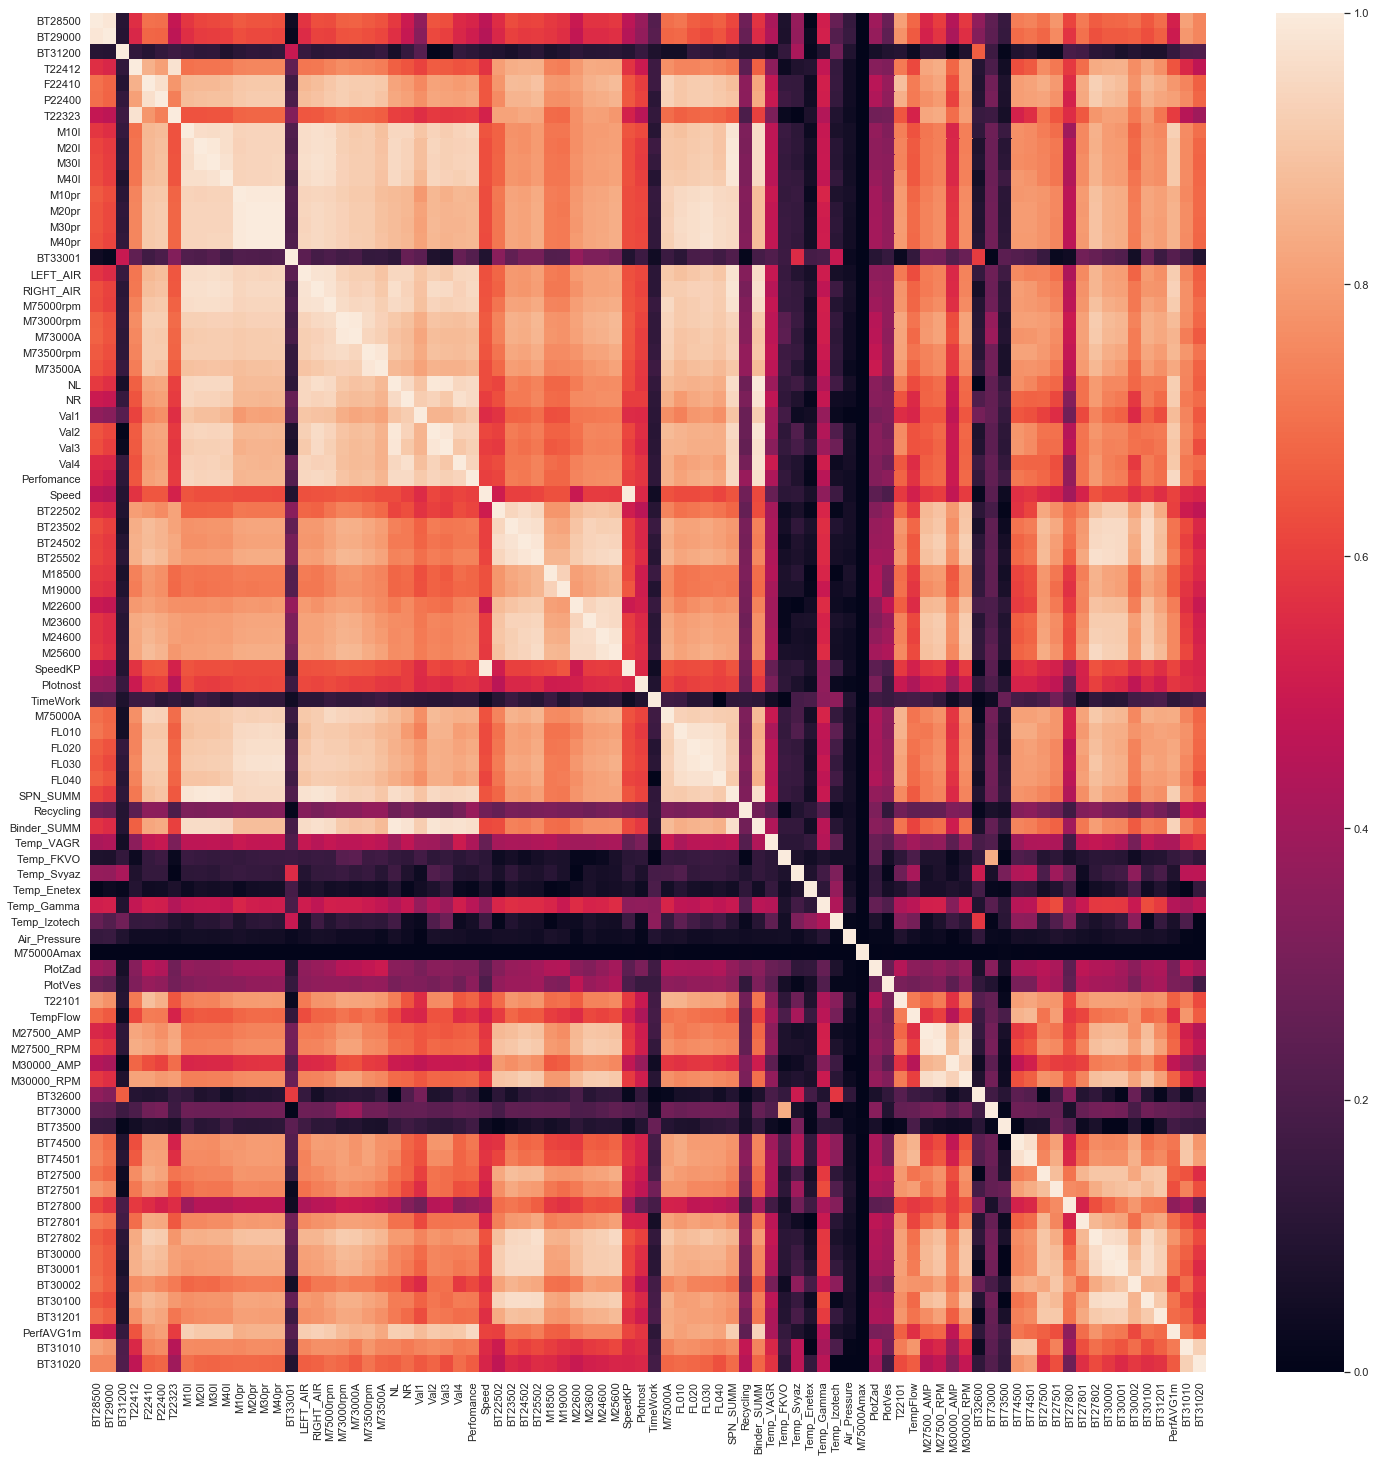

In [117]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(25, 25)
# plot the heatmap
sns.heatmap(corr_matrix)

In [118]:
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]


In [119]:
df02=df01.drop(to_drop, axis=1)

In [120]:
df02.shape

(132398, 34)

In [121]:
df02

,Data,BT28500,BT31200,T22412,F22410,M10I,BT33001,Speed,BT22502,M18500,...,TempFlow,M30000_AMP,BT32600,BT73000,BT73500,BT74500,BT27500,BT27501,BT27800,BT27801
0,2018-10-01 00:00:11,72.9,16.1,596.2374,8227.938,17.68015,10.2,0.00000,174.3,0.0,...,719.2387,25.6,20.5,27.3,19.0,37.3,85.9,51.8,81.8,128.0
1,2018-10-01 00:01:11,72.9,16.1,595.9479,8212.564,17.75299,10.3,0.00000,171.0,0.0,...,719.2387,25.3,20.5,26.6,19.9,36.6,85.3,51.9,79.9,126.6
2,2018-10-01 00:02:11,72.6,16.1,595.9479,8178.975,17.73995,10.3,2.29600,168.7,57.9,...,719.2387,28.6,20.6,25.9,20.8,35.7,84.5,52.0,79.1,124.9
3,2018-10-01 00:03:11,72.9,16.1,595.3690,8227.268,17.68675,10.3,0.00000,171.8,0.0,...,719.2387,26.0,20.6,25.3,21.3,35.0,83.7,51.9,81.8,123.5
4,2018-10-01 00:04:11,73.0,16.1,594.7902,8191.643,17.80392,10.4,0.00000,172.5,0.0,...,719.2387,24.8,20.5,25.0,22.0,34.2,82.7,51.8,79.5,121.8
5,2018-10-01 00:05:11,73.1,16.1,594.7902,8179.616,17.72400,10.4,0.00000,170.7,0.0,...,719.2387,25.9,20.5,24.6,22.4,33.6,81.9,51.8,74.3,120.2
6,2018-10-01 00:06:11,73.1,16.1,594.5007,8209.821,17.72026,10.5,2.26275,172.1,60.0,...,719.2387,27.0,20.5,24.2,22.9,32.9,81.2,51.8,79.5,118.3
7,2018-10-01 00:07:11,73.1,16.1,594.5007,8176.164,17.73560,10.6,0.00000,177.7,0.0,...,719.2387,25.4,20.5,23.9,23.3,32.3,81.0,51.8,79.8,116.9
8,2018-10-01 00:08:11,73.1,16.1,594.5007,8233.776,17.74643,10.6,0.00000,172.1,0.0,...,719.2387,25.0,20.5,23.6,23.5,31.6,81.5,51.6,95.2,115.6
9,2018-10-01 00:09:11,73.1,16.1,594.7902,8179.616,17.77994,10.7,0.00000,167.7,0.0,...,719.2387,25.4,20.6,23.7,23.8,31.0,81.9,51.5,87.9,115.0
